In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r'novi_datasetovi\train_test_v1.csv', parse_dates=['date'])
df=df.drop(columns=['Unnamed: 0'])
df.head()

date  store_nbr      family  sales  onpromotion   city      state  \
0 2013-01-01          1  AUTOMOTIVE    0.0          0.0  Quito  Pichincha   
1 2013-01-01          1   BABY CARE    0.0          0.0  Quito  Pichincha   
2 2013-01-01          1      BEAUTY    0.0          0.0  Quito  Pichincha   
3 2013-01-01          1   BEVERAGES    0.0          0.0  Quito  Pichincha   
4 2013-01-01          1       BOOKS    0.0          0.0  Quito  Pichincha   

  type  cluster  work_day  ...  N Futbol  N Independencia de Cuenca  \
0    D       13         0  ...         0                          0   
1    D       13         0  ...         0                          0   
2    D       13         0  ...         0                          0   
3    D       13         0  ...         0                          0   
4    D       13         0  ...         0                          0   

   N Independencia de Guayaquil  N Navidad  N Primer Grito de Independencia  \
0                             0          0                                0   
1                             0          0                                0   
2                             0          0                                0   
3                             0          0                                0   
4                             0          0                                0   

   N Primer dia del ano  N Terremoto Manabi  N Viernes Santo  oil_price  \
0                     1                   0                0      93.14   
1                     1                   0                0      93.14   
2                     1                   0                0      93.14   
3                     1                   0                0      93.14   
4                     1                   0                0      93.14   

   transactions  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  

[5 rows x 54 columns]

In [4]:
train=df[df['date']<'2017-08-16']
test=df[df['date']>= '2017-08-16']

In [5]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [6]:
#wide form
train_wide=pd.pivot(train, index=['date'], columns=['store_nbr','family'], values=['sales'])
train_wide.head()

sales                                                \
store_nbr          1                                                  
family     AUTOMOTIVE BABY CARE BEAUTY BEVERAGES BOOKS BREAD/BAKERY   
date                                                                  
2013-01-01        0.0       0.0    0.0       0.0   0.0        0.000   
2013-01-02        2.0       0.0    2.0    1091.0   0.0      470.652   
2013-01-03        3.0       0.0    0.0     919.0   0.0      310.655   
2013-01-04        3.0       0.0    3.0     953.0   0.0      198.366   
2013-01-05        5.0       0.0    3.0    1160.0   0.0      301.057   

                                                                               \
store_nbr                                                                       
family     CELEBRATION CLEANING  DAIRY     DELI   EGGS FROZEN FOODS GROCERY I   
date                                                                            
2013-01-01         0.0      0.0    0.0    0.000    0.0        0.000       0.0   
2013-01-02         0.0   1060.0  579.0  164.069  246.0      131.000    2652.0   
2013-01-03         0.0    836.0  453.0  151.582  203.0       87.044    2121.0   
2013-01-04         0.0    827.0  460.0  131.411  171.0       65.000    2056.0   
2013-01-05         0.0    811.0  464.0  118.613  177.0       70.000    2216.0   

                                                                       \
store_nbr                                                               
family     GROCERY II HARDWARE HOME AND KITCHEN I HOME AND KITCHEN II   
date                                                                    
2013-01-01        0.0      0.0                0.0                 0.0   
2013-01-02       31.0      3.0                0.0                 0.0   
2013-01-03       12.0      1.0                0.0                 0.0   
2013-01-04       15.0      7.0                0.0                 0.0   
2013-01-05       30.0      1.0                0.0                 0.0   

                                                                          \
store_nbr                                                                  
family     HOME APPLIANCES HOME CARE LADIESWEAR LAWN AND GARDEN LINGERIE   
date                                                                       
2013-01-01             0.0       0.0        0.0             0.0      0.0   
2013-01-02             0.0       0.0        0.0            10.0     13.0   
2013-01-03             2.0       0.0        0.0             0.0     15.0   
2013-01-04             0.0       0.0        0.0             7.0     24.0   
2013-01-05             0.0       0.0        0.0            10.0     20.0   

                                                                           \
store_nbr                                                                   
family     LIQUOR,WINE,BEER MAGAZINES    MEATS PERSONAL CARE PET SUPPLIES   
date                                                                        
2013-01-01              0.0       0.0    0.000           0.0          0.0   
2013-01-02             67.0       0.0  369.101         194.0          0.0   
2013-01-03             66.0       0.0  272.319         153.0          0.0   
2013-01-04            102.0       0.0  454.172          88.0          0.0   
2013-01-05            159.0       0.0  328.940         141.0          0.0   

                                                                      \
store_nbr                                                              
family     PLAYERS AND ELECTRONICS    POULTRY PREPARED FOODS PRODUCE   
date                                                                   
2013-01-01                     0.0    0.00000            0.0     0.0   
2013-01-02                     0.0  247.29700           47.0     0.0   
2013-01-03                     0.0  187.27800           63.0     0.0   
2013-01-04                     0.0  258.02300           67.0     0.0   
2013-01-05                     0.

In [7]:
#scaling sales for boxplots
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

train_wide_scaled=train_wide.copy()
for col in train_wide_scaled.columns:
    train_wide_scaled[col] = scaler.fit_transform(train_wide_scaled[[col]])

train_wide_scaled.head()

sales                                                   \
store_nbr          1                                                     
family     AUTOMOTIVE BABY CARE    BEAUTY BEVERAGES BOOKS BREAD/BAKERY   
date                                                                     
2013-01-01   0.000000       0.0  0.000000  0.000000   0.0     0.000000   
2013-01-02   0.105263       0.0  0.166667  0.215997   0.0     0.631313   
2013-01-03   0.157895       0.0  0.000000  0.181944   0.0     0.416700   
2013-01-04   0.157895       0.0  0.250000  0.188676   0.0     0.266080   
2013-01-05   0.263158       0.0  0.250000  0.229657   0.0     0.403825   

                                                                             \
store_nbr                                                                     
family     CELEBRATION  CLEANING     DAIRY      DELI      EGGS FROZEN FOODS   
date                                                                          
2013-01-01         0.0  0.000000  0.000000  0.000000  0.000000     0.000000   
2013-01-02         0.0  0.638939  0.472653  0.608908  1.000000     0.023356   
2013-01-03         0.0  0.503918  0.369796  0.562565  0.825203     0.015519   
2013-01-04         0.0  0.498493  0.375510  0.487704  0.695122     0.011589   
2013-01-05         0.0  0.488849  0.378776  0.440207  0.719512     0.012481   

                                                              \
store_nbr                                                      
family     GROCERY I GROCERY II  HARDWARE HOME AND KITCHEN I   
date                                                           
2013-01-01  0.000000   0.000000  0.000000                0.0   
2013-01-02  0.292554   0.206667  0.230769                0.0   
2013-01-03  0.233977   0.080000  0.076923                0.0   
2013-01-04  0.226806   0.100000  0.538462                0.0   
2013-01-05  0.244457   0.200000  0.076923                0.0   

                                                                     \
store_nbr                                                             
family     HOME AND KITCHEN II HOME APPLIANCES HOME CARE LADIESWEAR   
date                                                                  
2013-01-01                 0.0        0.000000       0.0        0.0   
2013-01-02                 0.0        0.000000       0.0        0.0   
2013-01-03                 0.0        0.333333       0.0        0.0   
2013-01-04                 0.0        0.000000       0.0        0.0   
2013-01-05                 0.0        0.000000       0.0        0.0   

                                                                           \
store_nbr                                                                   
family     LAWN AND GARDEN  LINGERIE LIQUOR,WINE,BEER MAGAZINES     MEATS   
date                                                                        
2013-01-01        0.000000  0.000000         0.000000       0.0  0.000000   
2013-01-02        0.095238  0.276596         0.112605       0.0  0.329662   
2013-01-03        0.000000  0.319149         0.110924       0.0  0.243221   
2013-01-04        0.066667  0.510638         0.171429       0.0  0.405643   
2013-01-05        0.095238  0.425532         0.267227       0.0  0.293792   

                                                                         \
store_nbr                                                                 
family     PERSONAL CARE PET SUPPLIES PLAYERS AND ELECTRONICS   POULTRY   
date                                                                      
2013-01-01      0.000000          0.0                     0.0  0.000000   
2013-01-02      0.243108          0.0                     0.0  0.277302   
2013-01-03      0.191729          0.0                     0.0  0.210000   
2013-01-04      0.110276          0.0                     0.0  0.289329   
2013-01-05      0.176692          0.0                     0.0  0.238095   

                                                  

In [8]:
# convert back to long form
df_sales_scaled=train_wide_scaled.melt(value_name='sales_scaled', ignore_index=False).reset_index()
df_sales_scaled_sorted = df_sales_scaled.sort_values(by=['date', 'store_nbr','family'])
df_sales_scaled_sorted=df_sales_scaled_sorted.reset_index(drop=True)
df_sales_scaled_sorted.tail()

date   None  store_nbr                      family  sales_scaled
3008011 2017-08-15  sales         54                     POULTRY      0.168551
3008012 2017-08-15  sales         54              PREPARED FOODS      0.525140
3008013 2017-08-15  sales         54                     PRODUCE      0.540480
3008014 2017-08-15  sales         54  SCHOOL AND OFFICE SUPPLIES      0.000000
3008015 2017-08-15  sales         54                     SEAFOOD      0.125000

In [9]:
def plot_boxplots(data : pd.DataFrame, y : str):

    plot_kwargs = {
        "palette": ["red", "green"],
        "linewidth": 2,
        "flierprops": {"alpha": 0.2},
        "orient": "h",
    }
    
    fig = plt.figure(figsize=(18, 20))

    sns.boxplot(
        data=data, #saturday
        y=y,
        x="sales_scaled",
        ax=fig.add_subplot(531),
        **plot_kwargs,
    )
    plt.yticks([0, 1], ["no", "yes"])
        
    plt.suptitle(f"Distribution of {y}")
    plt.tight_layout()
    plt.show()

In [10]:
def plot_correlation(col1: pd.Series, col2: pd.Series):
  
    # calculate the correlation
    correlation = col1.corr(col2)
    print(f"Correlation between {col1.name} and {col2.name}: {correlation}")

    plt.figure(figsize=(14, 6))

    # plot scatter plot
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=col1, y=col2)
    plt.title(f'Scatter plot of {col1.name} vs {col2.name}')
    plt.xlabel(col1.name)
    plt.ylabel(col2.name)

    # plot heatmap
    plt.subplot(1, 2, 2)
    corr_matrix = pd.DataFrame({col1.name: col1, col2.name: col2}).corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True)
    plt.title('Correlation heatmap')

    plt.tight_layout()
    plt.show()

In [11]:
#ONPROMOTION

train_prom=train.copy()

#wide format
train_prom_wide=pd.pivot(train_prom, index='date', columns=['store_nbr','family'], values='onpromotion')

#scaling promotion for
train_prom_wide_scaled=train_prom_wide.copy()
for col in train_prom_wide_scaled.columns:
    train_prom_wide_scaled[col] = scaler.fit_transform(train_prom_wide_scaled[[col]])

train_prom_wide_scaled.head()

store_nbr          1                                                 \
family     AUTOMOTIVE BABY CARE BEAUTY BEVERAGES BOOKS BREAD/BAKERY   
date                                                                  
2013-01-01        0.0       0.0    0.0       0.0   0.0          0.0   
2013-01-02        0.0       0.0    0.0       0.0   0.0          0.0   
2013-01-03        0.0       0.0    0.0       0.0   0.0          0.0   
2013-01-04        0.0       0.0    0.0       0.0   0.0          0.0   
2013-01-05        0.0       0.0    0.0       0.0   0.0          0.0   

store_nbr                                                               \
family     CELEBRATION CLEANING DAIRY DELI EGGS FROZEN FOODS GROCERY I   
date                                                                     
2013-01-01         0.0      0.0   0.0  0.0  0.0          0.0       0.0   
2013-01-02         0.0      0.0   0.0  0.0  0.0          0.0       0.0   
2013-01-03         0.0      0.0   0.0  0.0  0.0          0.0       0.0   
2013-01-04         0.0      0.0   0.0  0.0  0.0          0.0       0.0   
2013-01-05         0.0      0.0   0.0  0.0  0.0          0.0       0.0   

store_nbr                                                              \
family     GROCERY II HARDWARE HOME AND KITCHEN I HOME AND KITCHEN II   
date                                                                    
2013-01-01        0.0      0.0                0.0                 0.0   
2013-01-02        0.0      0.0                0.0                 0.0   
2013-01-03        0.0      0.0                0.0                 0.0   
2013-01-04        0.0      0.0                0.0                 0.0   
2013-01-05        0.0      0.0                0.0                 0.0   

store_nbr                                                                 \
family     HOME APPLIANCES HOME CARE LADIESWEAR LAWN AND GARDEN LINGERIE   
date                                                                       
2013-01-01             0.0       0.0        0.0             0.0      0.0   
2013-01-02             0.0       0.0        0.0             0.0      0.0   
2013-01-03             0.0       0.0        0.0             0.0      0.0   
2013-01-04             0.0       0.0        0.0             0.0      0.0   
2013-01-05             0.0       0.0        0.0             0.0      0.0   

store_nbr                                                               \
family     LIQUOR,WINE,BEER MAGAZINES MEATS PERSONAL CARE PET SUPPLIES   
date                                                                     
2013-01-01              0.0       0.0   0.0           0.0          0.0   
2013-01-02              0.0       0.0   0.0           0.0          0.0   
2013-01-03              0.0       0.0   0.0           0.0          0.0   
2013-01-04              0.0       0.0   0.0           0.0          0.0   
2013-01-05              0.0       0.0   0.0           0.0          0.0   

store_nbr                                                          \
family     PLAYERS AND ELECTRONICS POULTRY PREPARED FOODS PRODUCE   
date                                                                
2013-01-01                     0.0     0.0            0.0     0.0   
2013-01-02                     0.0     0.0            0.0     0.0   
2013-01-03                     0.0     0.0            0.0     0.0   
2013-01-04                     0.0     0.0            0.0     0.0   
2013-01-05                     0.0     0.0            0.0     0.0   

store_nbr                                             2                    \
family     SCHOOL AND OFFICE SUPPLIES SEAFOOD AUTOMOTIVE BABY CARE BEAUTY   
date                                                                        
2013-01-01                        0.0     0.0        0.0       0.0    0.0   
2013-01-02                        0.0     0.0        0.0       0.0    0.0   
2013-01-03                        0.0     0.0        0.0       0.0    0.0   
2013-01-04                        0.

In [12]:
# convert back to long form
df_prom_scaled=train_prom_wide_scaled.melt(value_name='prom_scaled', ignore_index=False).reset_index()
df_prom_scaled_sorted = df_prom_scaled.sort_values(by=['date', 'store_nbr' ,'family'])
df_prom_scaled_sorted=df_prom_scaled_sorted.reset_index(drop=True)
df_prom_scaled_sorted.head()

date  store_nbr      family  prom_scaled
0 2013-01-01          1  AUTOMOTIVE          0.0
1 2013-01-01          1   BABY CARE          0.0
2 2013-01-01          1      BEAUTY          0.0
3 2013-01-01          1   BEVERAGES          0.0
4 2013-01-01          1       BOOKS          0.0

In [13]:
#adding sales_scaled column to train_prom
train_prom.loc[:,'sales_scaled']=df_sales_scaled_sorted.loc[:,'sales_scaled'].copy()

In [14]:
train_prom.loc[:,'prom_scaled']=df_prom_scaled_sorted.loc[:,'prom_scaled'].copy()
train_prom[['onpromotion','prom_scaled']].head()

onpromotion  prom_scaled
0          0.0          0.0
1          0.0          0.0
2          0.0          0.0
3          0.0          0.0
4          0.0          0.0

Correlation between prom_scaled and sales_scaled: 0.3015167203063811


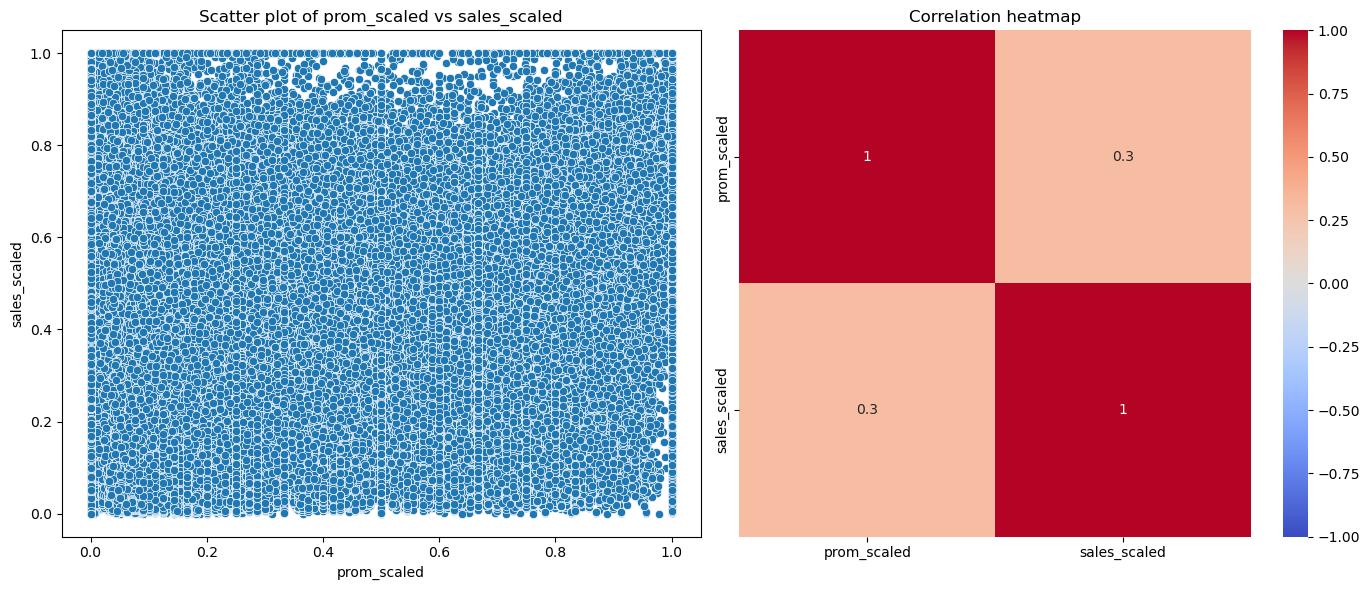

In [15]:
plot_correlation(train_prom['prom_scaled'], train_prom['sales_scaled'])

In [16]:
#checheking promotion correlation with different families

family_promo_corr = pd.Series(
    {fam: train_prom[train_prom['family'] == fam]['prom_scaled'].corr(train_prom[train_prom['family'] == fam]['sales_scaled'])
     for fam in train['family'].unique()}
)

family_promo_corr.sort_values(ascending=False)
#BOOKS are never on promotion

SCHOOL AND OFFICE SUPPLIES    0.588999
PRODUCE                       0.448397
BEVERAGES                     0.442883
HOME CARE                     0.412334
BEAUTY                        0.328573
DAIRY                         0.304890
MEATS                         0.296072
HOME AND KITCHEN I            0.294596
SEAFOOD                       0.270111
GROCERY I                     0.262400
BREAD/BAKERY                  0.246620
PET SUPPLIES                  0.246523
HOME AND KITCHEN II           0.235348
LAWN AND GARDEN               0.232890
FROZEN FOODS                  0.219206
PERSONAL CARE                 0.208258
POULTRY                       0.200456
LIQUOR,WINE,BEER              0.198825
DELI                          0.181306
CLEANING                      0.137141
PREPARED FOODS                0.128887
AUTOMOTIVE                    0.128089
EGGS                          0.121585
CELEBRATION                   0.116856
GROCERY II                    0.091056
PLAYERS AND ELECTRONICS  

In [17]:
#checheking promotion correlation with different stores

store_promo_corr = pd.Series(
    {store: train_prom[train_prom['store_nbr'] == store]['prom_scaled'].corr(train_prom[train_prom['store_nbr'] == store]['sales_scaled'])
     for store in range(1,55)}
)

store_promo_corr.sort_values(key=abs, ascending=False)

52    0.660644
22    0.447686
42    0.439536
29    0.430029
21    0.402732
20    0.379360
53    0.373193
49    0.373182
43    0.365475
28    0.332158
40    0.331179
17    0.329347
35    0.326231
47    0.322143
15    0.318424
1     0.316017
11    0.315033
25    0.311998
9     0.310386
31    0.301747
51    0.299948
8     0.298708
7     0.296883
3     0.296151
12    0.295309
45    0.295266
36    0.295144
24    0.294519
46    0.293782
27    0.293641
50    0.289955
23    0.289175
6     0.286431
4     0.284947
39    0.281290
13    0.281200
30    0.280410
44    0.279968
19    0.279827
14    0.277590
32    0.277519
34    0.275538
54    0.267725
37    0.267572
48    0.265100
10    0.260179
38    0.249017
18    0.248088
5     0.247221
33    0.232348
41    0.223085
2     0.213833
16    0.206629
26    0.198857
dtype: float64

In [18]:
#mean sales and mean promotion
mean_train_wide_scaled = train_wide_scaled.mean(axis=1).to_frame("sales").reset_index()
mean_train_prom_wide_scaled = train_prom_wide_scaled.mean(axis=1).to_frame("onpromotion").reset_index()

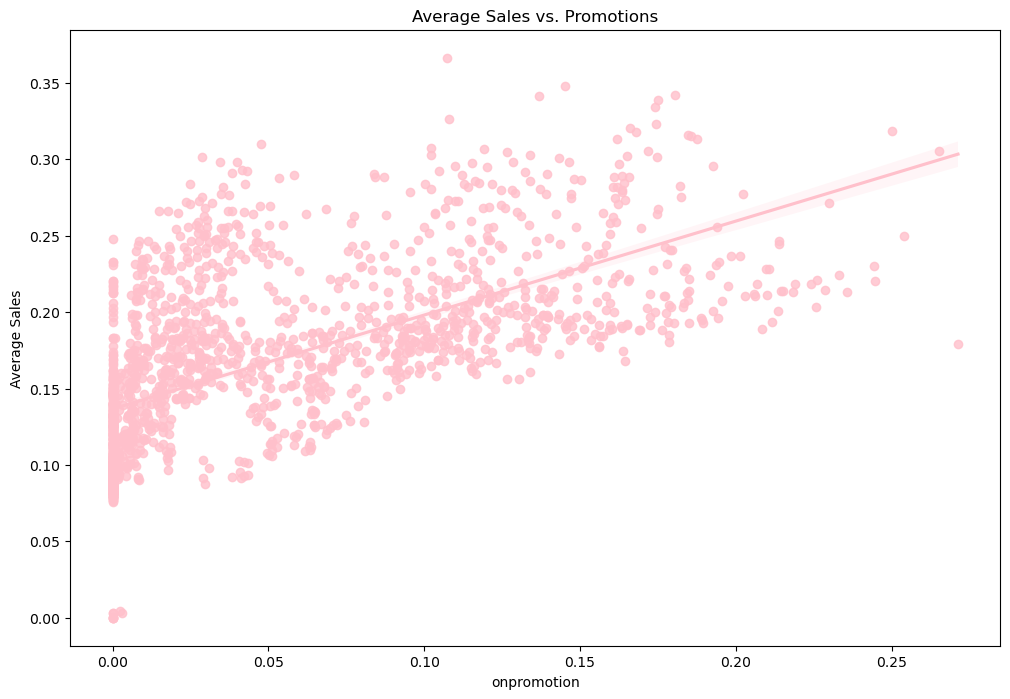

In [19]:
#plot mean sales mean promotion
#every point is one date
fig = plt.figure(figsize=(12, 8))
sns.regplot(x=mean_train_prom_wide_scaled.onpromotion, y=mean_train_wide_scaled.sales, color='pink')
plt.xlabel("onpromotion")
plt.ylabel("Average Sales")
plt.title("Average Sales vs. Promotions")

plt.show()

#conclusion: promotions are positevly corr with avg sales

In [20]:
#checheking promotion correlation with different stores and different families
store_family_promo_corr = train_prom.groupby(['store_nbr', 'family']).apply(lambda x: x['prom_scaled'].corr(x['sales_scaled']))
store_family_promo_corr_sorted=store_family_promo_corr.sort_values(key=abs, ascending=False)
store_family_promo_corr_sorted.to_csv('store_family_promo_corr_sorted.csv', header=True)

In [21]:
#TRANSACTIONS - same process as promotions

train_trans=train.copy()

#wide format
train_trans_wide=pd.pivot(train_trans, index='date', columns=['store_nbr','family'], values='transactions')

#scaling transactions for plotting
train_trans_wide_scaled=train_trans_wide.copy()
for col in train_trans_wide_scaled.columns:
    train_trans_wide_scaled[col] = scaler.fit_transform(train_trans_wide_scaled[[col]])

train_trans_wide_scaled.head()

store_nbr          1                                                        \
family     AUTOMOTIVE BABY CARE    BEAUTY BEVERAGES     BOOKS BREAD/BAKERY   
date                                                                         
2013-01-01   0.000000  0.000000  0.000000  0.000000  0.000000     0.000000   
2013-01-02   0.698313  0.698313  0.698313  0.698313  0.698313     0.698313   
2013-01-03   0.606351  0.606351  0.606351  0.606351  0.606351     0.606351   
2013-01-04   0.616275  0.616275  0.616275  0.616275  0.616275     0.616275   
2013-01-05   0.499173  0.499173  0.499173  0.499173  0.499173     0.499173   

store_nbr                                                                    \
family     CELEBRATION  CLEANING     DAIRY      DELI      EGGS FROZEN FOODS   
date                                                                          
2013-01-01    0.000000  0.000000  0.000000  0.000000  0.000000     0.000000   
2013-01-02    0.698313  0.698313  0.698313  0.698313  0.698313     0.698313   
2013-01-03    0.606351  0.606351  0.606351  0.606351  0.606351     0.606351   
2013-01-04    0.616275  0.616275  0.616275  0.616275  0.616275     0.616275   
2013-01-05    0.499173  0.499173  0.499173  0.499173  0.499173     0.499173   

store_nbr                                                     \
family     GROCERY I GROCERY II  HARDWARE HOME AND KITCHEN I   
date                                                           
2013-01-01  0.000000   0.000000  0.000000           0.000000   
2013-01-02  0.698313   0.698313  0.698313           0.698313   
2013-01-03  0.606351   0.606351  0.606351           0.606351   
2013-01-04  0.616275   0.616275  0.616275           0.616275   
2013-01-05  0.499173   0.499173  0.499173           0.499173   

store_nbr                                                            \
family     HOME AND KITCHEN II HOME APPLIANCES HOME CARE LADIESWEAR   
date                                                                  
2013-01-01            0.000000        0.000000  0.000000   0.000000   
2013-01-02            0.698313        0.698313  0.698313   0.698313   
2013-01-03            0.606351        0.606351  0.606351   0.606351   
2013-01-04            0.616275        0.616275  0.616275   0.616275   
2013-01-05            0.499173        0.499173  0.499173   0.499173   

store_nbr                                                                  \
family     LAWN AND GARDEN  LINGERIE LIQUOR,WINE,BEER MAGAZINES     MEATS   
date                                                                        
2013-01-01        0.000000  0.000000         0.000000  0.000000  0.000000   
2013-01-02        0.698313  0.698313         0.698313  0.698313  0.698313   
2013-01-03        0.606351  0.606351         0.606351  0.606351  0.606351   
2013-01-04        0.616275  0.616275         0.616275  0.616275  0.616275   
2013-01-05        0.499173  0.499173         0.499173  0.499173  0.499173   

store_nbr                                                                \
family     PERSONAL CARE PET SUPPLIES PLAYERS AND ELECTRONICS   POULTRY   
date                                                                      
2013-01-01      0.000000     0.000000                0.000000  0.000000   
2013-01-02      0.698313     0.698313                0.698313  0.698313   
2013-01-03      0.606351     0.606351                0.606351  0.606351   
2013-01-04      0.616275     0.616275                0.616275  0.616275   
2013-01-05      0.499173     0.499173                0.499173  0.499173   

store_nbr                                                                 \
family     PREPARED FOODS   PRODUCE SCHOOL AND OFFICE SUPPLIES   SEAFOOD   
date                                                                       
2013-01-01       0.000000  0.000000                   0.000000  0.000000   
2013-01-02       0.698313  0.698313                   0.698313  0.698313   
2013-01-03       0.606351  0.606351                   0.606351

In [22]:
# convert back to long form
df_trans_scaled=train_trans_wide_scaled.melt(value_name='trans_scaled', ignore_index=False).reset_index()
df_trans_scaled_sorted = df_trans_scaled.sort_values(by=['date', 'store_nbr','family'])
df_trans_scaled_sorted=df_trans_scaled_sorted.reset_index(drop=True)
df_trans_scaled_sorted.head()

date  store_nbr      family  trans_scaled
0 2013-01-01          1  AUTOMOTIVE           0.0
1 2013-01-01          1   BABY CARE           0.0
2 2013-01-01          1      BEAUTY           0.0
3 2013-01-01          1   BEVERAGES           0.0
4 2013-01-01          1       BOOKS           0.0

In [23]:
#adding sales_scaled column to train_prom
train_trans.loc[:,'sales_scaled']=df_sales_scaled_sorted.loc[:,'sales_scaled'].copy()

In [24]:
train_trans.loc[:,'trans_scaled']=df_trans_scaled_sorted.loc[:,'trans_scaled'].copy()
train_trans[['transactions','trans_scaled']].head()

transactions  trans_scaled
0           0.0           0.0
1           0.0           0.0
2           0.0           0.0
3           0.0           0.0
4           0.0           0.0

Correlation between trans_scaled and sales_scaled: 0.32182483242701837


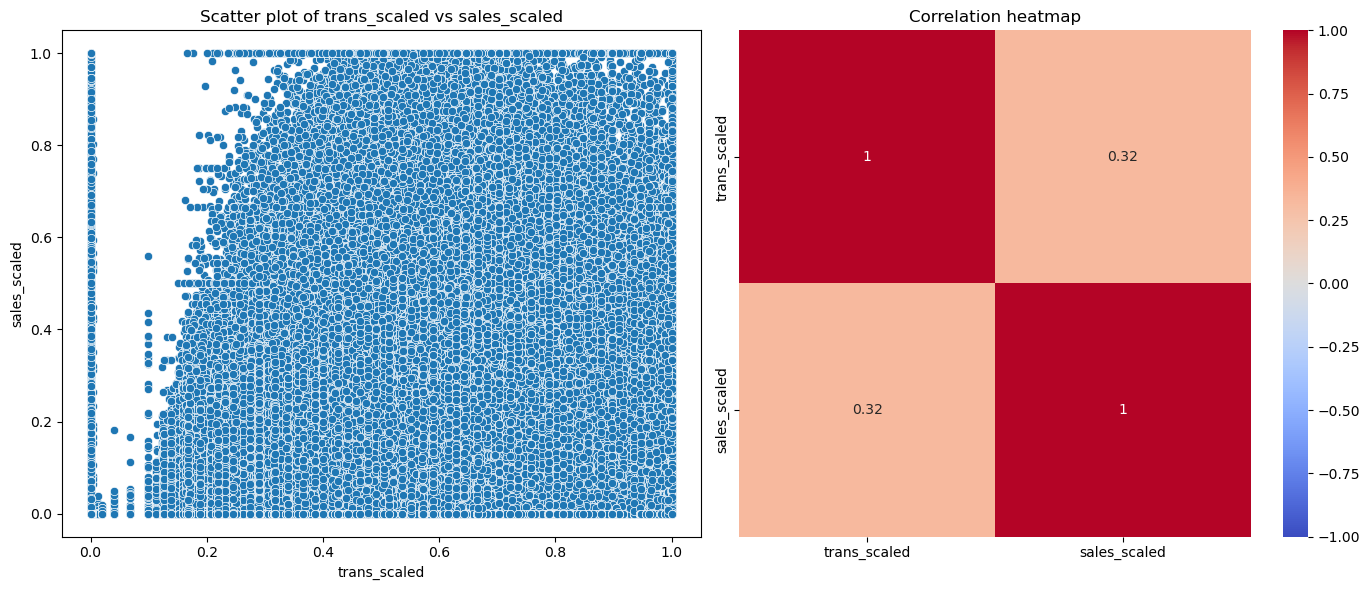

In [25]:
plot_correlation(train_trans['trans_scaled'], train_trans['sales_scaled'])

In [26]:
#checheking transaction correlation with different families

family_trans_corr = pd.Series(
    {fam: train_trans[train_trans['family'] == fam]['trans_scaled'].corr(train_trans[train_trans['family'] == fam]['sales_scaled'])
     for fam in train['family'].unique()}
)

family_trans_corr.sort_values(ascending=False)

DELI                          0.747468
DAIRY                         0.682985
BREAD/BAKERY                  0.641379
PREPARED FOODS                0.628850
GROCERY I                     0.592086
MEATS                         0.569848
CLEANING                      0.564120
PERSONAL CARE                 0.561547
BEVERAGES                     0.535774
POULTRY                       0.529001
EGGS                          0.528248
GROCERY II                    0.421472
SEAFOOD                       0.416186
LIQUOR,WINE,BEER              0.389978
FROZEN FOODS                  0.379963
AUTOMOTIVE                    0.365993
LINGERIE                      0.357282
PRODUCE                       0.339706
BEAUTY                        0.337213
HOME CARE                     0.329483
PLAYERS AND ELECTRONICS       0.275938
LADIESWEAR                    0.262395
HARDWARE                      0.258964
HOME AND KITCHEN II           0.247667
HOME AND KITCHEN I            0.242727
PET SUPPLIES             

In [27]:
#checheking transaction correlation with different stores

store_trans_corr = pd.Series(
    {store: train_trans[train_trans['store_nbr'] == store]['trans_scaled'].corr(train_trans[train_trans['store_nbr'] == store]['sales_scaled'])
     for store in range(1,55)}
)

store_trans_corr.sort_values(key=abs, ascending=False)

52    0.861047
42    0.719904
21    0.697101
29    0.658376
22    0.648866
20    0.617686
53    0.552980
25    0.477172
48    0.371382
49    0.363839
27    0.342843
28    0.335188
36    0.326964
46    0.325536
17    0.295887
41    0.295843
45    0.291184
47    0.286326
44    0.267424
31    0.261571
24    0.247427
1     0.246266
3     0.235383
35    0.235109
6     0.234065
40    0.231495
50    0.227510
18    0.221185
38    0.219682
43    0.215091
4     0.193680
12    0.189090
54    0.186657
19    0.185519
39    0.183712
9     0.166001
51    0.163343
14    0.155137
11    0.152368
30    0.145705
2     0.144792
26    0.143373
8     0.140082
7     0.137976
13    0.134601
37    0.131236
16    0.126118
32    0.122044
33    0.112306
15    0.101935
5     0.092741
10    0.081239
34    0.071718
23    0.024666
dtype: float64

In [28]:
#mean sales and mean transactions
#mean_train_wide_scaled = train_wide_scaled.mean(axis=1).to_frame("sales").reset_index()
mean_train_trans_wide_scaled = train_trans_wide_scaled.mean(axis=1).to_frame("transactions").reset_index()

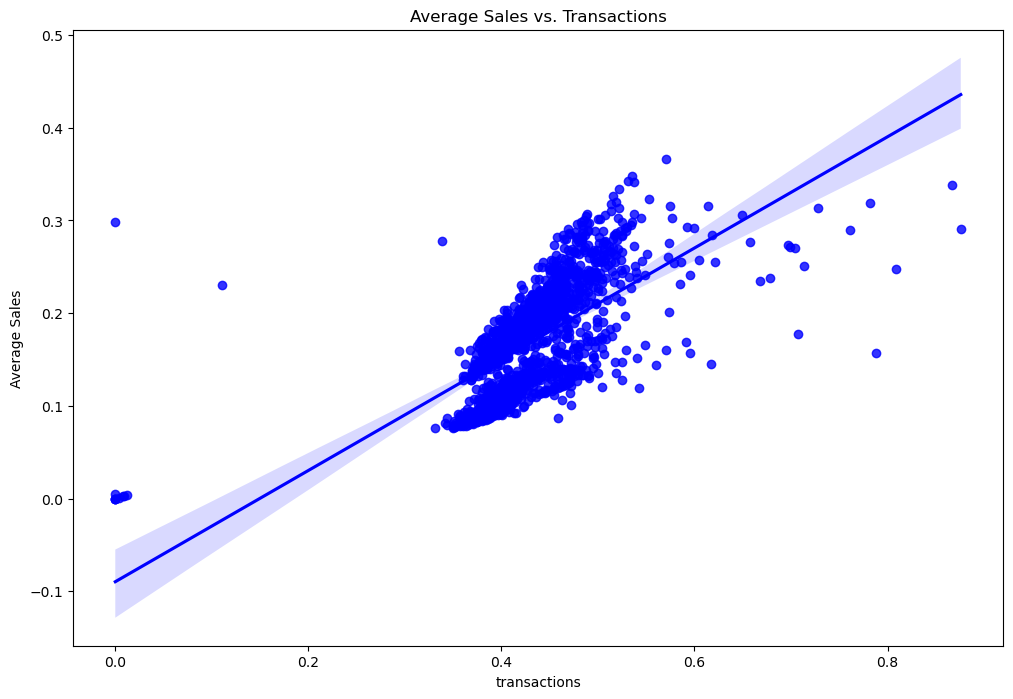

In [29]:
#plot mean sales and oil prices
#every point is one date
fig = plt.figure(figsize=(12, 8))
sns.regplot(x=mean_train_trans_wide_scaled.transactions, y=mean_train_wide_scaled.sales, color='blue')
plt.xlabel("transactions")
plt.ylabel("Average Sales")
plt.title("Average Sales vs. Transactions")

plt.show()

#conclusion: transactions are positevly corr with avg sales

In [30]:
#checheking transactions correlation with different stores and different families
store_family_trans_corr = train_trans.groupby(['store_nbr', 'family']).apply(lambda x: x['trans_scaled'].corr(x['sales_scaled']))
store_family_trans_corr_sorted=store_family_trans_corr.sort_values(key=abs, ascending=False)
store_family_trans_corr_sorted.to_csv('store_family_trans_corr_sorted.csv', header=True)

In [38]:
#OIL
train_oil=train.copy()

In [33]:
#adding sales_scaled column to train_prom
train_oil.loc[:,'sales_scaled']=df_sales_scaled_sorted.loc[:,'sales_scaled'].copy()

In [37]:
plot_correlation(train_oil['oil_price'], train_oil['sales_scaled'])

Correlation between oil_price and sales_scaled: -0.19977841996695056


In [59]:
train.head()

date  store_nbr      family  sales  onpromotion   city      state  \
0 2013-01-01          1  AUTOMOTIVE    0.0          0.0  Quito  Pichincha   
1 2013-01-01          1   BABY CARE    0.0          0.0  Quito  Pichincha   
2 2013-01-01          1      BEAUTY    0.0          0.0  Quito  Pichincha   
3 2013-01-01          1   BEVERAGES    0.0          0.0  Quito  Pichincha   
4 2013-01-01          1       BOOKS    0.0          0.0  Quito  Pichincha   

  type  cluster  work_day  L Cantonizacion de Cayambe  \
0    D       13         0                           0   
1    D       13         0                           0   
2    D       13         0                           0   
3    D       13         0                           0   
4    D       13         0                           0   

   L Cantonizacion de El Carmen  L Cantonizacion de Guaranda  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   L Cantonizacion de Latacunga  L Cantonizacion de Libertad  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   L Cantonizacion de Quevedo  L Cantonizacion de Riobamba  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   L Cantonizacion de Salinas  L Cantonizacion del Puyo  \
0                           0                         0   
1                           0                         0   
2                           0                         0   
3                           0                         0   
4                           0                         0   

   L Fundacion de Ambato  L Fundacion de Cuenca  L Fundacion de Esmeraldas  \
0                      0                      0                          0   
1                      0                      0                          0   
2                      0                      0                          0   
3                      0                      0                          0   
4                      0                      0                          0   

   L Fundacion de Guayaquil  L Fundacion de Ibarra  L Fundacion de Loja  \
0                         0                      0                    0   
1                         0                      0                    0   
2                         0                      0                    0   
3                         0                      0                    0   
4                         0                      0                    0   

   L Fundacion de Machala  L Fundacion de Manta  L Fundacion de Quito  \
0                       0                     0                     0   
1                       0                     0                     0   
2                       0                     0                     0   
3                       0                     0                     0   
4                       0                     0                     0   

   L Fundacion de Riobamba  L Fundacion de Santo Domingo  \
0                        0                             0   
1                        0                             0   
2                        0                             0   
3                        0                             0   
4                        0                   

In [71]:
la=train.copy()
la = la[['date', 'family', 'sales', 'oil_price']]
aggregated = la.groupby(['date', 'family']).agg({'sales': 'sum', 'oil_price': 'first'}).reset_index()
aggregated.head()

date      family  sales  oil_price
0 2013-01-01  AUTOMOTIVE    0.0      93.14
1 2013-01-01   BABY CARE    0.0      93.14
2 2013-01-01      BEAUTY    2.0      93.14
3 2013-01-01   BEVERAGES  810.0      93.14
4 2013-01-01       BOOKS    0.0      93.14

In [74]:
transactions=pd.read_csv(r'originalni_datasetovi\transactions.csv', parse_dates=['date'])

In [76]:
transactions.head()

date  store_nbr  transactions
0 2013-01-01         25           770
1 2013-01-02          1          2111
2 2013-01-02          2          2358
3 2013-01-02          3          3487
4 2013-01-02          4          1922

In [79]:
transactions=train.groupby(['date','store_nbr']).transactions.first().reset_index()
transactions.head()

date  store_nbr  transactions
0 2013-01-01          1           0.0
1 2013-01-01          2           0.0
2 2013-01-01          3           0.0
3 2013-01-01          4           0.0
4 2013-01-01          5           0.0

In [80]:
temp = pd.merge(train.groupby(["date", "store_nbr"]).sales.sum().reset_index(), transactions, how = "left")
print("Spearman Correlation between Total Sales and Transactions: {:,.4f}".format(temp.corr("spearman").sales.loc["transactions"]))

Spearman Correlation between Total Sales and Transactions: 0.8556


In [72]:
aggregated['sales'].corr(aggregated['oil_price'])

-0.09613946250452803

In [40]:
#checheking oil correlation with different families

family_oil_corr = pd.Series(
    {fam: train_oil[train_oil['family'] == fam]['oil_price'].corr(train_oil[train_oil['family'] == fam]['sales_scaled'])
     for fam in train['family'].unique()}
)

family_oil_corr.sort_values(key=abs,ascending=False)

PRODUCE                      -0.554000
HOME CARE                    -0.529757
MAGAZINES                    -0.487694
HOME AND KITCHEN II          -0.470789
BEVERAGES                    -0.444244
PLAYERS AND ELECTRONICS      -0.443901
PET SUPPLIES                 -0.430395
HOME AND KITCHEN I           -0.413998
DAIRY                        -0.396702
CELEBRATION                  -0.395899
LADIESWEAR                   -0.304710
DELI                         -0.299538
PERSONAL CARE                -0.233846
BEAUTY                       -0.233275
GROCERY I                    -0.228443
BREAD/BAKERY                 -0.224702
PREPARED FOODS               -0.208010
AUTOMOTIVE                   -0.203390
POULTRY                      -0.187780
LAWN AND GARDEN              -0.171614
SCHOOL AND OFFICE SUPPLIES   -0.161693
FROZEN FOODS                 -0.157052
CLEANING                     -0.150297
BABY CARE                    -0.150065
SEAFOOD                      -0.117945
LINGERIE                 

In [42]:
#checheking oil correlation with different stores

store_oil_corr = pd.Series(
    {store: train_oil[train_oil['store_nbr'] == store]['oil_price'].corr(train_oil[train_oil['store_nbr'] == store]['sales_scaled'])
     for store in range(1,55)}
)

store_oil_corr.sort_values(key=abs, ascending=False)

29   -0.540131
42   -0.525225
21   -0.511958
20   -0.510072
22   -0.442510
53   -0.420140
49   -0.305638
36   -0.273029
40   -0.262517
17   -0.252605
39   -0.250185
27   -0.249509
24   -0.244551
31   -0.239110
3    -0.225789
28   -0.224945
41   -0.222674
43   -0.208055
19   -0.205894
47   -0.202514
54   -0.196927
12   -0.195461
7    -0.194163
8    -0.193849
15   -0.190445
45   -0.185618
52   -0.183365
2    -0.182495
9    -0.181975
11   -0.181354
6    -0.178793
4    -0.174887
30   -0.171864
35   -0.170940
48   -0.170456
46   -0.165214
1    -0.161808
14   -0.160455
25   -0.156400
13   -0.154237
44   -0.153846
37   -0.153095
50   -0.147940
23   -0.144485
51   -0.132849
10   -0.131317
34   -0.128725
33   -0.125916
38   -0.123505
32   -0.113486
5    -0.108396
18   -0.104908
26   -0.074717
16   -0.048838
dtype: float64

In [46]:
train_oil.oil_price.shape

(3008016,)

In [49]:
train_oil.shape

(3008016, 56)

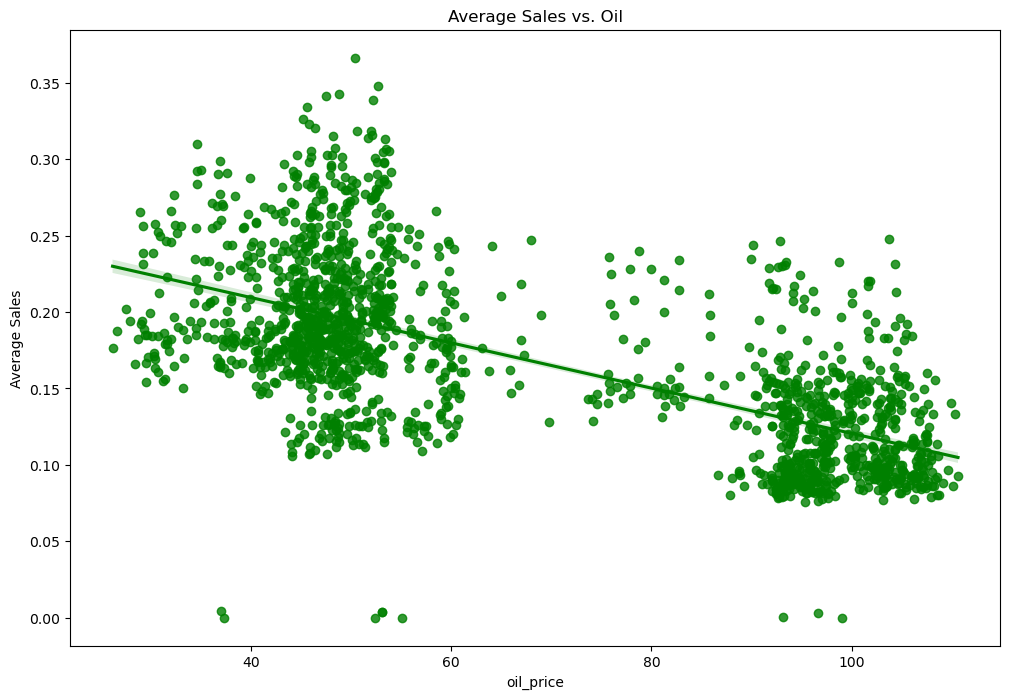

In [52]:
#plot mean sales mean oil
#every point is one date
fig = plt.figure(figsize=(12, 8))
sns.regplot(x=mean_train_oil_wide.oil_price, y=mean_train_wide_scaled.sales, color='green')
plt.xlabel("oil_price")
plt.ylabel("Average Sales")
plt.title("Average Sales vs. Oil")

plt.show()

#conclusion: oil is negatively corr with avg sales

In [54]:
#checheking oil correlation with different stores and different families
store_family_oil_corr = train_oil.groupby(['store_nbr', 'family']).apply(lambda x: x['oil_price'].corr(x['sales_scaled']))
store_family_oil_corr_sorted=store_family_oil_corr.sort_values(key=abs, ascending=False)
store_family_oil_corr_sorted.to_csv('store_family_oil_corr_sorted.csv', header=True)

In [57]:
train_c=train.copy()
train_c.loc[:,'sales_scaled']=df_sales_scaled_sorted.loc[:,'sales_scaled'].copy()
#Work Day
plot_boxplots(data=train_c[(train_c.date.dt.weekday==5)], y="work_day")

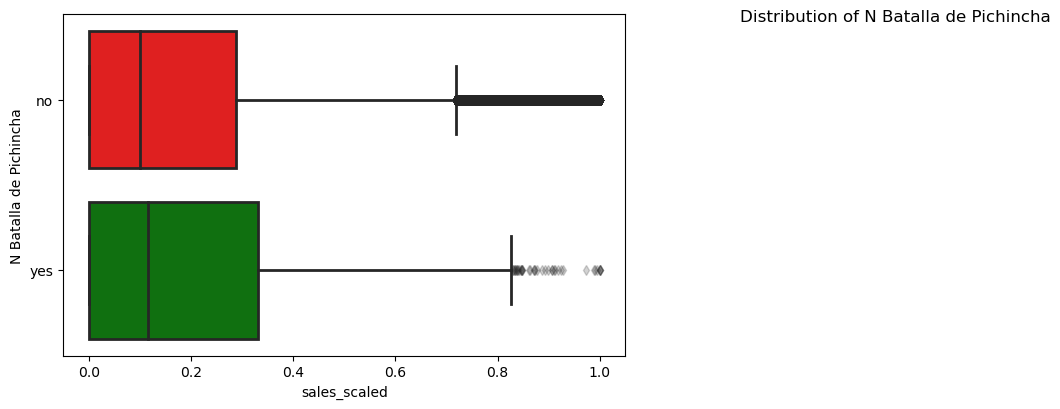

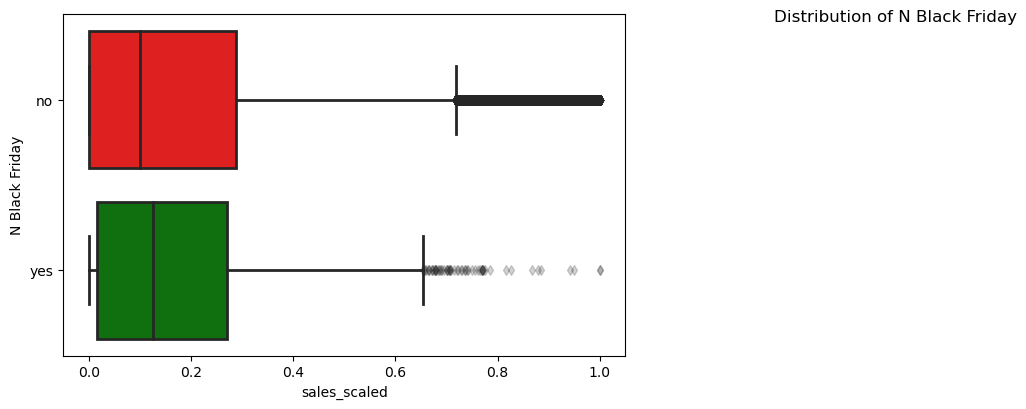

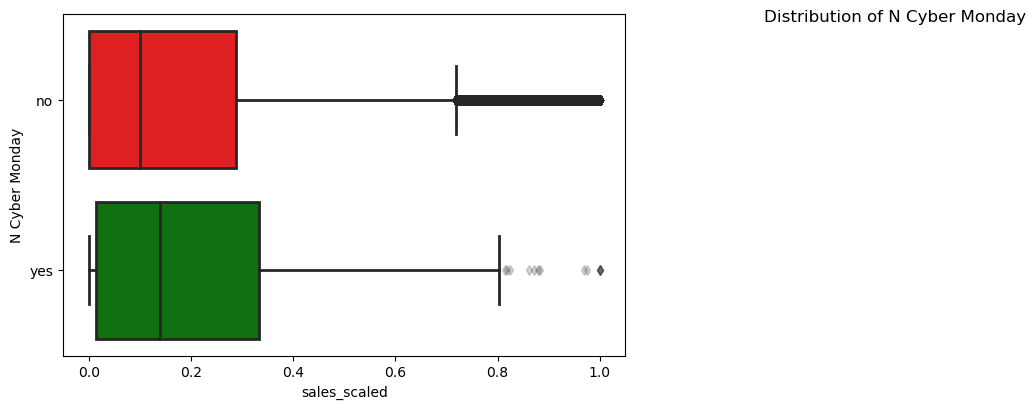

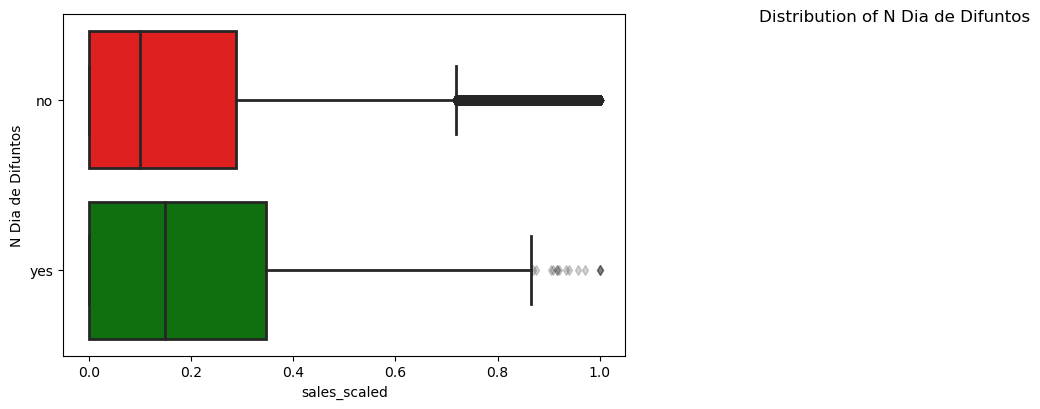

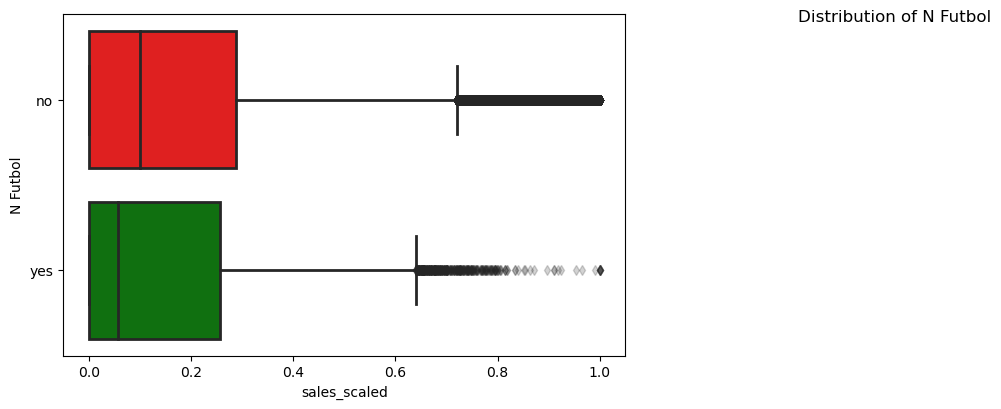

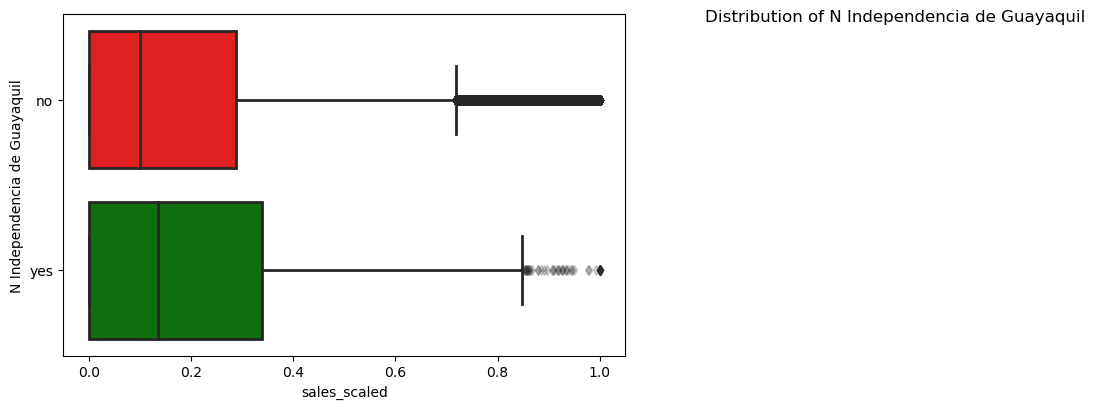

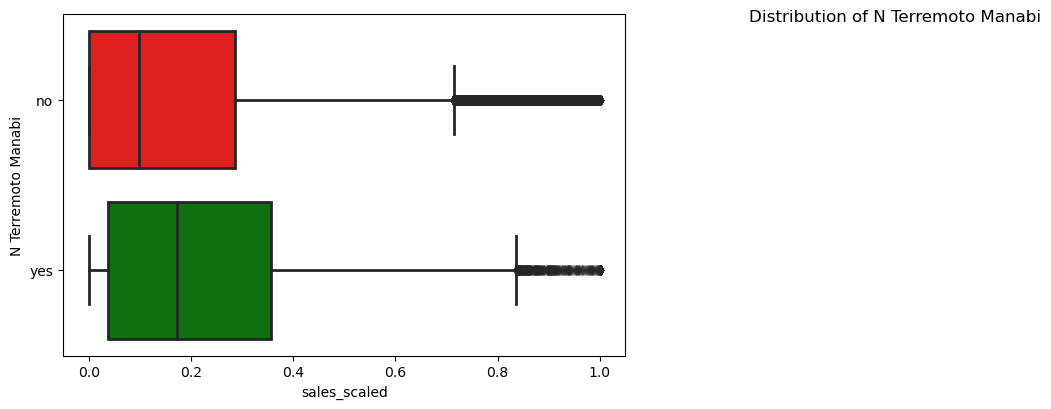

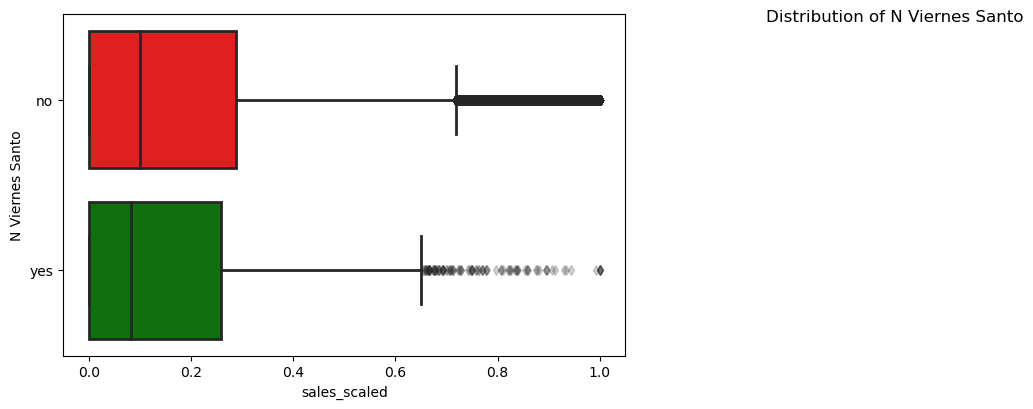

In [ ]:
#Holidays

#National holidays
train_c=train.copy()

columns = [col for col in train_c.columns if col.startswith('N ')] #NATIONAL HOLIDAYS
for col in columns: plot_boxplots(data=train_c, y=col)
